# Assessing Model Accuracy

In [5]:
draw.data <- function(n) {
    x <- sort(runif(n,-6,4));
    y <- (x^3+3*x^2-6*x-8)/10 + 2*rnorm(n)
    return(data.frame(x=x,y=y))
}

This defines $y=f(x) +\epsilon$. We will now estimate $f$ using OLS.

In [6]:
training.data <- draw.data(60)

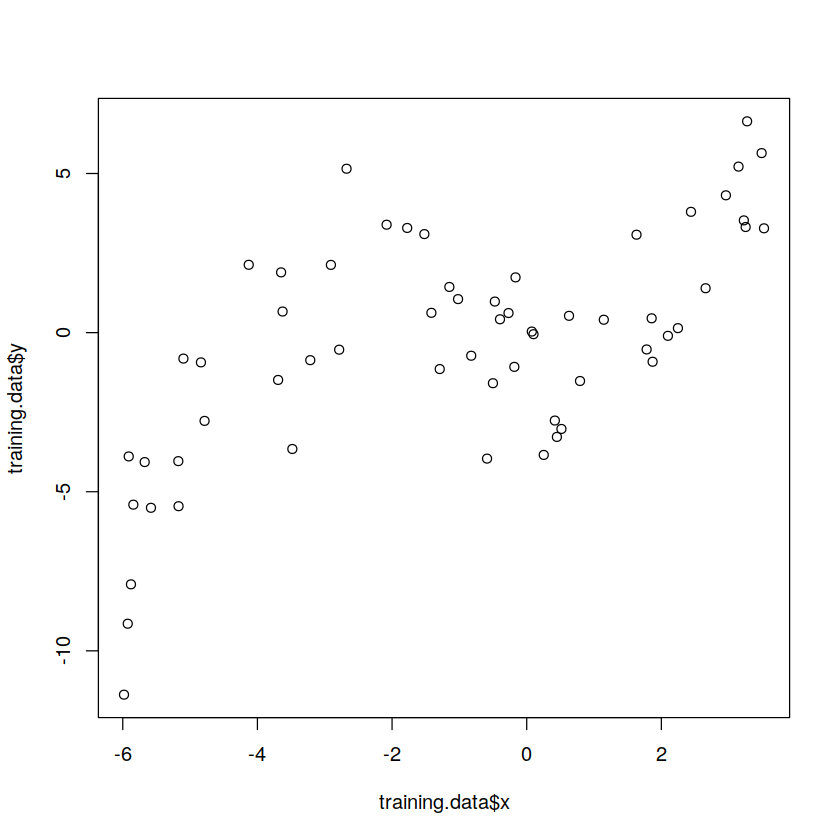

In [7]:
plot(training.data$x,training.data$y)

In [8]:
poly.fit <- function(degree) lm(y~poly(x,degree), data=training.data)

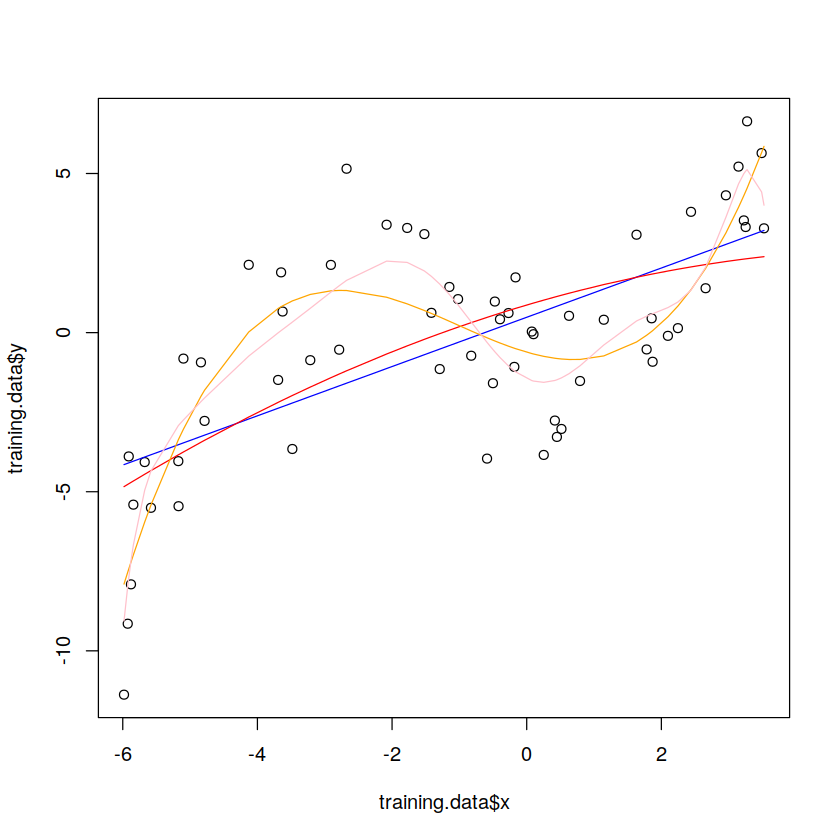

In [11]:
plot(training.data$x,training.data$y)
lines(training.data$x,predict(poly.fit(1)),col="blue")
lines(training.data$x,predict(poly.fit(2)),col="red")
lines(training.data$x,predict(poly.fit(3)),col="orange")
lines(training.data$x,predict(poly.fit(10)),col="pink")

In [13]:
testing.data <- draw.data(n=1000)

In [15]:
degrees <- 1:20
trMSE <- numeric(length(degrees))
teMSE <- numeric(length(degrees))

In [17]:
for(degree in degrees) {
    fit <-poly.fit(degree)
    trMSE[degree] <- mean((training.data$y-predict(fit,newdata=training.data))^2)
    teMSE[degree] <- mean((testing.data$y-predict(fit,newdata=testing.data))^2)
}

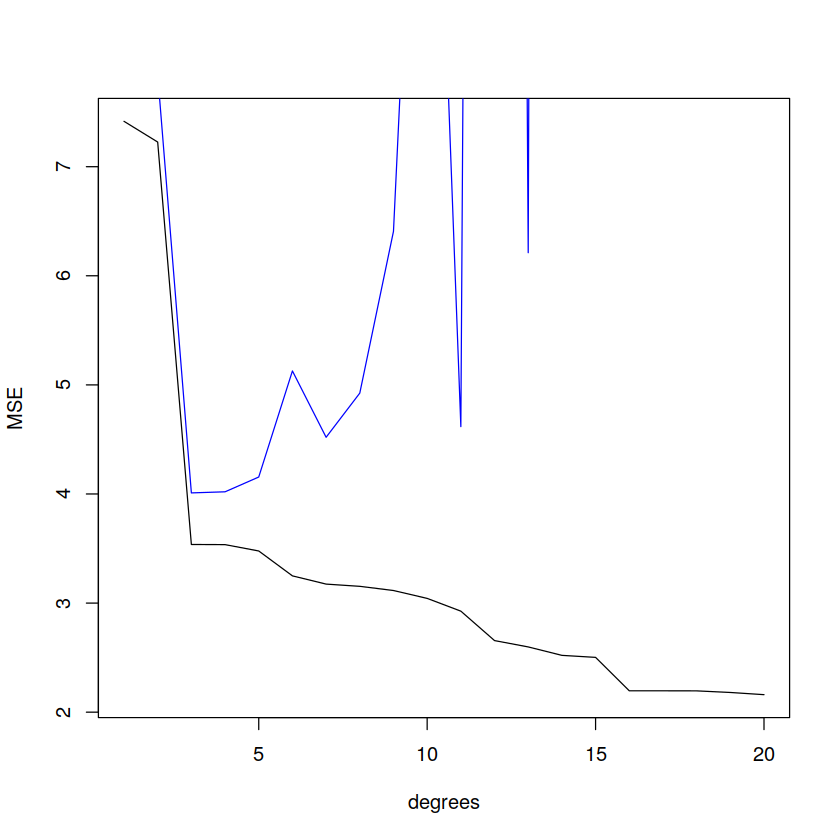

In [19]:
plot(degrees,trMSE,type='l',ylab="MSE")
lines(degrees,teMSE,col="blue")